# План работы:

1) Провести предварительную обработку данных: Закодировать категориальные данные в числовые значения.
2) Построить и обучить модели классификации: Использовать алгоритмы XGBoost и другие модели (например, Random Forest) для предсказания цен на товары.
3) Настроить гиперпараметры моделей для улучшения их точности. 
4) Провести оценку качества модели: Вычислить метрики классификации.
5) Сравнить производительность моделей и визуализировать результаты.

In [2]:
# Загрузим данные и обработаем их
import pandas as pd
# Загрузка данных
df = pd.read_csv('supermarket_sales.csv')

# Просмотр первых нескольких строк
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Проверка на пропуски
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
# Преобразуем категориальные признаки в бинарные с помощью get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Просмотр первых строк после преобразования
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Пояснение по столбцам:
1) Invoice ID - Уникальный идентификатор для каждой транзакции или чека, она помогает идентифицировать каждую запись в наборе данных.
2) Branch - Код филиала магазина, где была совершена покупка.
3) City- Код филиала магазина, где была совершена покупка.
4) Customer type - Тип клиента, совершившего покупку. Member - член программы лояльности, Normal - обычный покупатель.
5) Gender - Пол клиента.
6) Product line -  Категория товара, который был куплен.
7) Unit price - Цена за единицу товара.
8) Quantity - Количество купленных единиц товара.
9) Tax 5% - Налог на товар в размере 5% от стоимости покупки. (Unit_price * Quantity) * 0.05
10) Total - Общая сумма чека, включая налог.
11) Date - Дата совершения покупки.
12) Time - Времч совершения покупки.
13) Payment - способ отплаты(наличка, карта, электронный кошелек)
14) cogs - Цена товара без учета налога.
15) gross margin percentage - Процент валовой прибыли от общей суммы.
16) gross income - Валовая прибыль, полученная с продажи.
17) Rating - Оценка клиентом качества обслуживания или продукта.

<Figure size 1200x800 with 0 Axes>

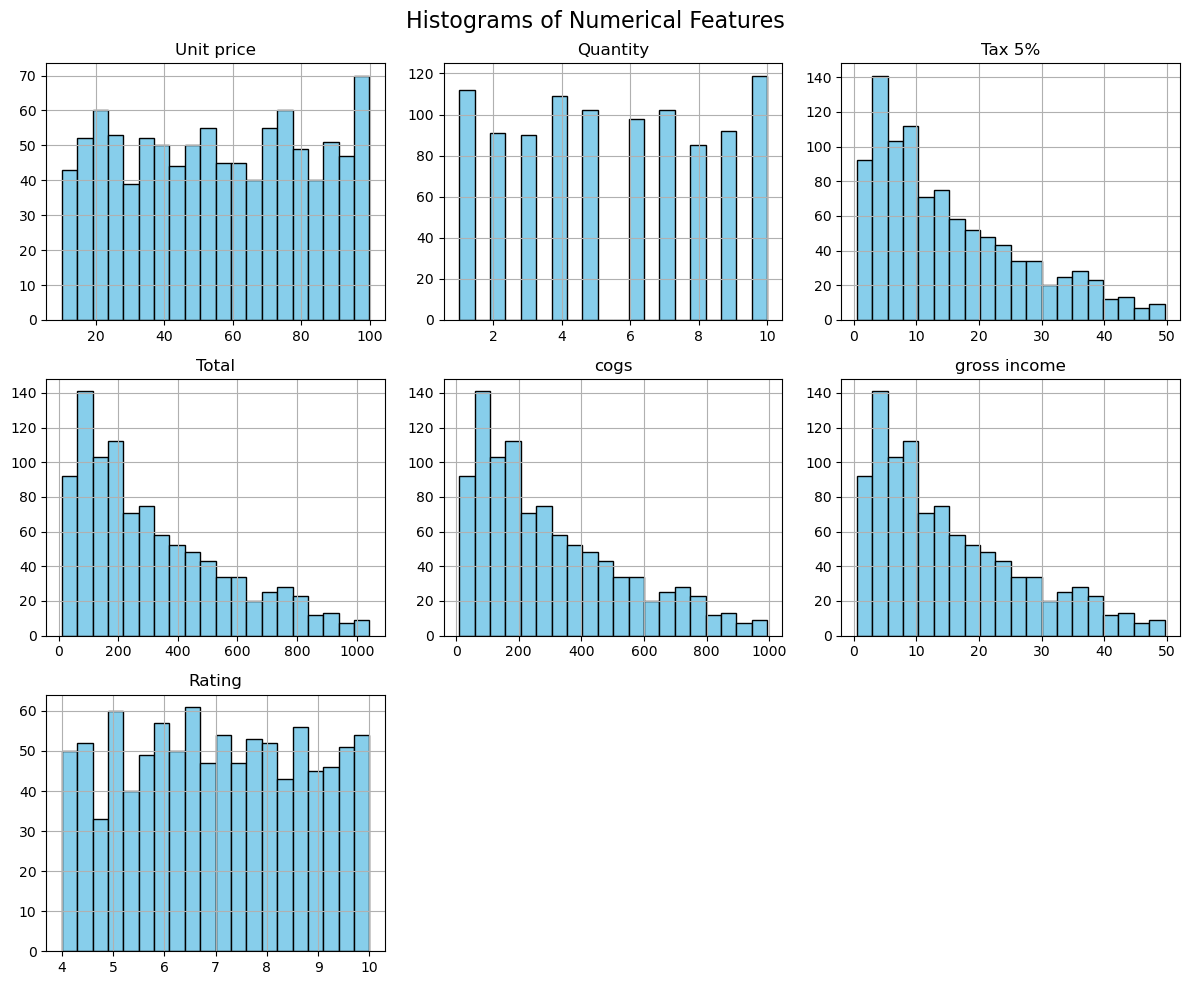

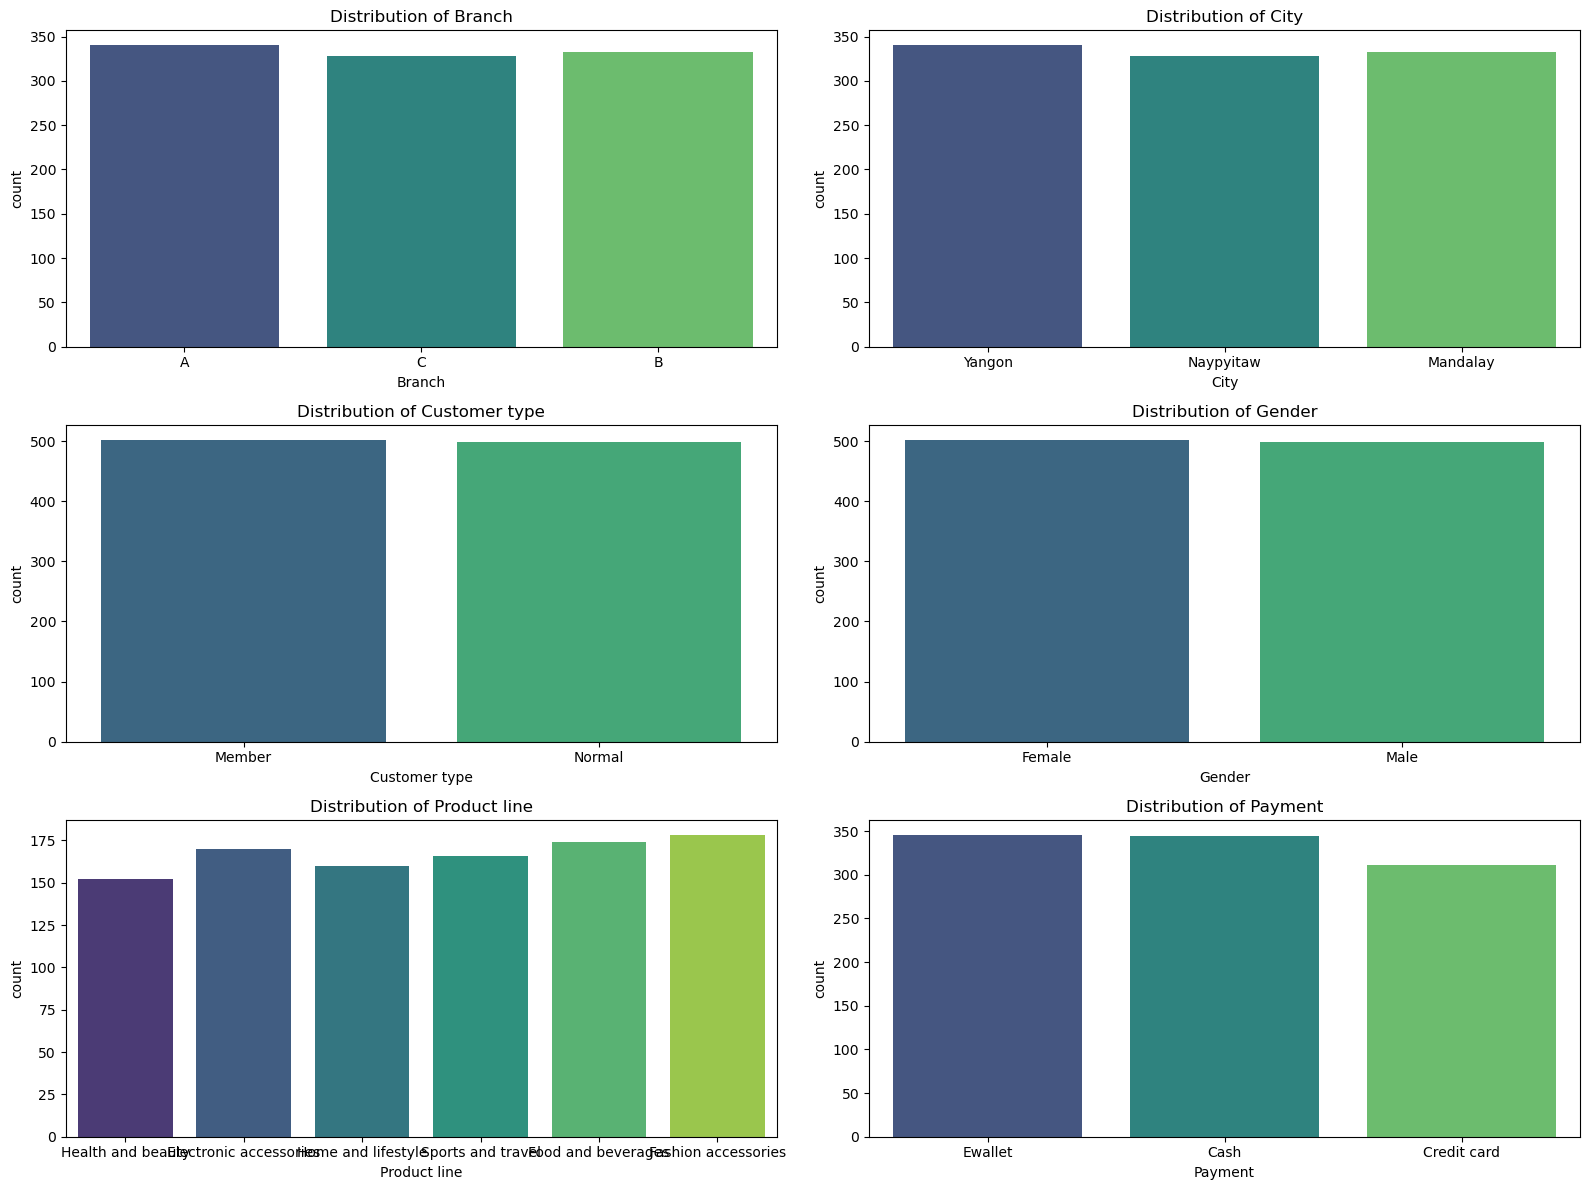

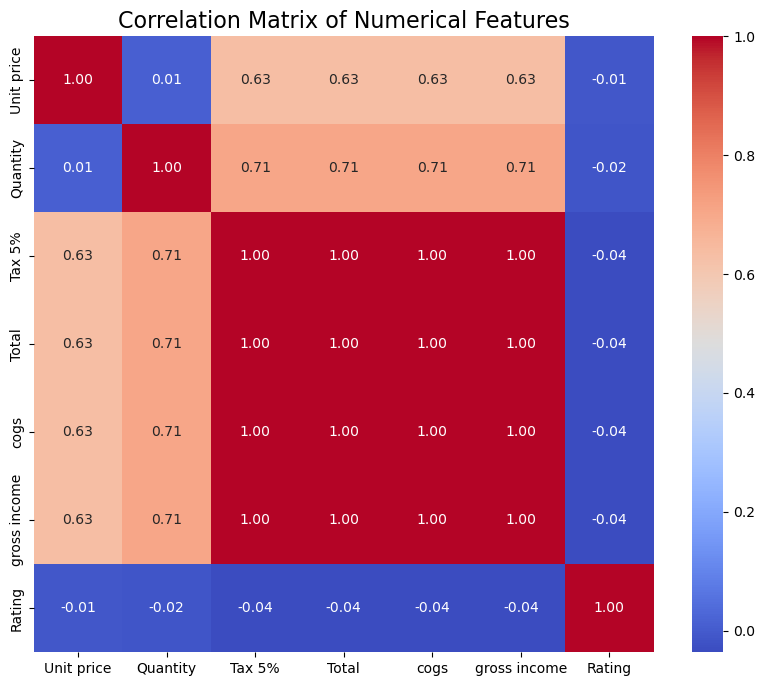

C:\Users\ACER\AppData\Local\Temp\ipykernel_14192\2640166793.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


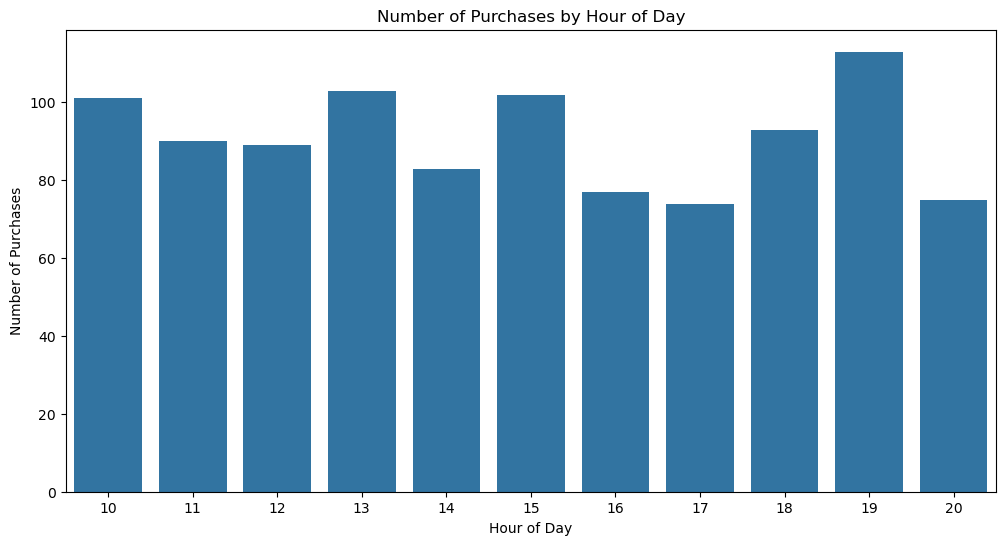

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение данных
df = pd.read_csv('supermarket_sales.csv')

# Гистограммы для числовых признаков
numerical_features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

plt.figure(figsize=(12, 8))
df[numerical_features].hist(bins=20, figsize=(12, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Столбчатые диаграммы для категориальных признаков
categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)  # Исправлено
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


# Количество покупок в разное время суток
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', ) 
plt.title('Number of Purchases by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


Прежде чем обучать модели, нужно разделить данные на признаки X и целевую переменную y. В данном случае целевая переменная — это цена товара, которая находится в столбце Total.

In [26]:
# Признаки X и целевая переменная y
X = df_encoded.drop('Total', axis=1)  # Все столбцы, кроме 'Total'
y = df_encoded['Total']  # Столбец 'Total' - цена товара

In [7]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Обучение модели с помощью XGboost:

In [8]:
import xgboost as xgb

# Создание модели XGBoost для регрессии
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Обучение модели
xgb_model.fit(X_train, y_train)

# Предсказания
y_pred_xgb = xgb_model.predict(X_test)

Обучение модели с помощью Random Forest:

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Создание модели Random Forest для регрессии
rf_model = RandomForestRegressor(random_state=42)

# Обучение модели
rf_model.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf_model.predict(X_test)

In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Параметры для случайного поиска
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Настройка RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, 
                                       n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Обучение модели
random_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 10, 20],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, verbose=2)

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Параметры для случайного поиска
param_dist_rf = {
    'n_estimators': [50, 100, 200, 500],  # Количество деревьев
    'max_depth': [5, 10, 20, 30, 100],    # Глубина деревьев
    'min_samples_split': [2, 5, 10],       # Минимальное количество примеров для разбиения
    'min_samples_leaf': [1, 2, 4],         # Минимальное количество примеров в листе,
    'bootstrap': [True, False]             # Использовать ли бутстрэп (случайную выборку)
}

# Создание модели Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Настройка RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, 
                                      n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Обучение модели
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, 100],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, verbose=2)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Предсказания для XGBoost
y_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)
y_pred_rf = random_search_rf.best_estimator_.predict(X_test)

# Оценка моделей
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Печать результатов для обеих моделей
print("XGBoost - MAE:", mae_xgb)
print("XGBoost - MSE:", mse_xgb)
print("XGBoost - R²:", r2_xgb)

print("\nRandom Forest - MAE:", mae_rf)
print("Random Forest - MSE:", mse_rf)
print("Random Forest - R²:", r2_rf)

XGBoost - MAE: 1.7314627552413935
XGBoost - MSE: 8.242718225612304
XGBoost - R²: 0.9998733039637492

Random Forest - MAE: 1.1438327687499872
Random Forest - MSE: 3.0934485392269813
Random Forest - R²: 0.9999524516479227


В нашем случае лучше всего показала себя модель с использованием Random Forest. Т.к. у нее самый высокий R^2 - коэффцинет детерминации и самые низкие MAE - средняя абсолютная ошибка и MSE - средняя квадратичная ошибка.

Визуализируем результаты оценок моделей на различных графиках: 
1) - график распределения ошибок, 
2) - график сравнения предсказанных и реальных значений для обеих моделей
3) - График метрик моделей для сравнения их точности.

In [ ]:
# График распределения ошибок
import matplotlib.pyplot as plt
import seaborn as sns

# Ошибки для XGBoost и Random Forest
errors_xgb = y_pred_xgb - y_test
errors_rf = y_pred_rf - y_test

# График распределения ошибок
plt.figure(figsize=(12, 6))
sns.histplot(errors_xgb, kde=True, color='blue', label='XGBoost Errors', stat='density', bins=30)
sns.histplot(errors_rf, kde=True, color='red', label='Random Forest Errors', stat='density', bins=30)
plt.title('Distribution of Prediction Errors (XGBoost vs Random Forest)')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.show()

График показывает, как распределяются ошибки предсказаний для обеих моделей. Чем более "сглаженная" кривая, тем более точной является модель.

In [ ]:
# График сравнения предсказанных и реальных значений
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(y_test.values, label='Real Values', color='blue', alpha = 0.4)

# Предсказания для XGBoost
#plt.plot(y_pred_xgb, label='XGBoost Predictions', color='red')

# Предсказания для Random Forest
#plt.plot(y_pred_rf, label='Random Forest Predictions', color='green')

plt.title('Real vs Predicted Values (XGBoost & Random Forest)')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
# Предсказания для XGBoost
plt.plot(y_pred_xgb, label='XGBoost Predictions', color='red', alpha = 0.5)
plt.title('Real vs Predicted Values (XGBoost & Random Forest)')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
# Предсказания для Random Forest
plt.plot(y_pred_xgb, label='XGBoost Predictions', color='purple', alpha = 0.5)
plt.title('Real vs Predicted Values (XGBoost & Random Forest)')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

По графикам видно, что обе модели накладываются на имеющиеся данные.

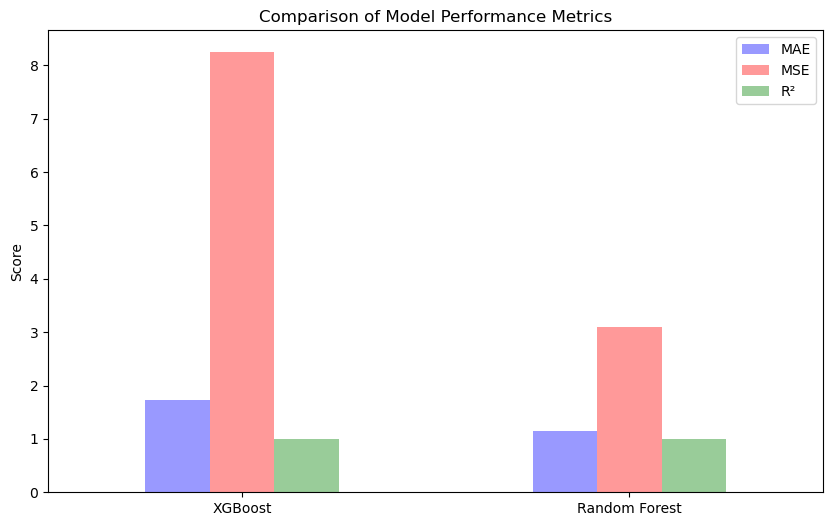

In [17]:
# Метрики для XGBoost и Random Forest
metrics = {
    'MAE': [mae_xgb, mae_rf],
    'MSE': [mse_xgb, mse_rf],
    'R²': [r2_xgb, r2_rf]
}

# Создаем DataFrame для удобства
metrics_df = pd.DataFrame(metrics, index=['XGBoost', 'Random Forest'])

# График сравнения метрик
metrics_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green'], alpha=0.4)
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


На этом графике мы видим, как XGBoost и Random Forest сравниваются по трем меткам точности: MAE, MSE, и R². Чем выше столбцы для R² и ниже для MAE и MSE, тем лучше работает модель.

In [20]:
import joblib

# Сохранение модели Random Forest
joblib.dump(random_search_rf.best_estimator_, 'random_forest_model.pkl')

['random_forest_model.pkl']